In [1]:
import pandas as pd
import numpy as np
import datasets
import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from baseline01  import Baseline01
from baseline02  import Baseline02SMA
from baseline02  import Baseline02EWMA
from IPython.display import display

In [2]:
#### EURUSD 2016 DS3 test dataset

In [3]:
# load  dataset
lookahead=1
dataset = 'DS3'
window=25
sym='EURUSD'
year=2016
title = sym + " " + str(year)
X_test, Y_test, prices_test = datasets.load(datasets.filename(dataset, lookahead, window, sym, year))

EURUSD 2016: f1-score: 0.511, mean future return: 0.015 bps, (0.015 bps), annualized future return 0.772 (0.775)


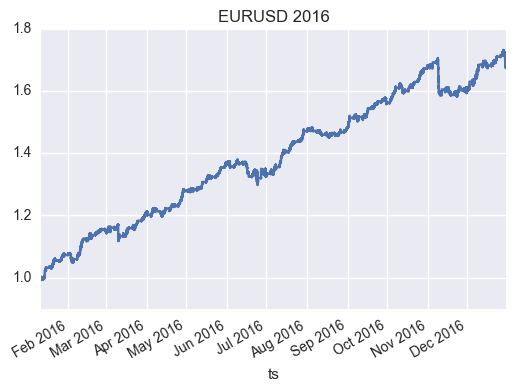

In [4]:
model = Baseline01(lookahead=1)
Y_test_pred = 1.0 - model.predict(prices_test)
metrics.performance_report(title,  prices_test,  lookahead, Y_test, Y_test_pred, cum_return_plot=True);

EURUSD 2016: f1-score: 0.512, mean future return: 0.019 bps, (0.019 bps), annualized future return 1.044 (1.045)


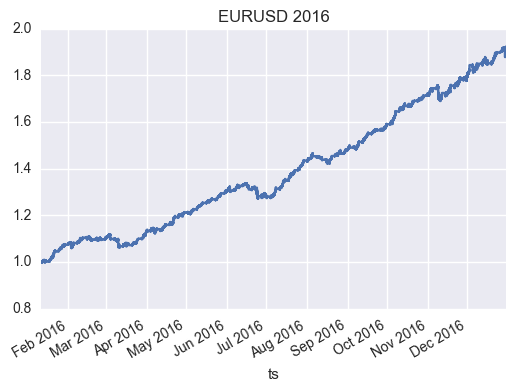

In [11]:
model = Baseline02SMA(lookahead=1, window=9)
Y_test_pred = 1.0-model.predict(prices_test)
metrics.performance_report(title,  prices_test,  lookahead, Y_test, Y_test_pred, cum_return_plot=True, heatmap=False);


Baseline Model 2 (EWMA) EURUSD 2016: f1-score: 0.516, mean future return: 0.025 bps, (0.025 bps), annualized future return 1.535 (1.535)


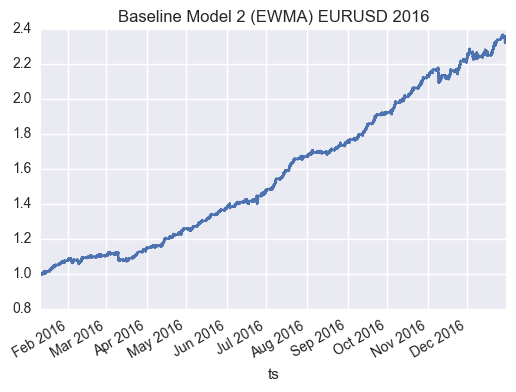

In [20]:
model = Baseline02EWMA(lookahead=1, centre_of_mass=21)
Y_test_pred = 1.0-model.predict(prices_test)
title = "Baseline Model 2 (EWMA) "+ sym + " " + str(year)
metrics.performance_report(title,  prices_test,  lookahead, Y_test, Y_test_pred, cum_return_plot=True, heatmap=False,
                            savefig='reportresources/baseline-model-2b-EURUSD2016-cumreturn.png');


---------------

#### EURUSD 2016 DS3T test dataset

In [13]:
# load test dataset
lookahead=1
dataset = 'DS3T'
window=25
sym='EURUSD'
year=2016
title = sym + " " + str(year)
X_test, Y_test, prices_test = datasets.load(datasets.filename(dataset, lookahead, window, sym, year))

EURUSD 2016: f1-score: 0.516, mean future return: 0.015 bps, (0.015 bps), annualized future return 0.772 (0.775)


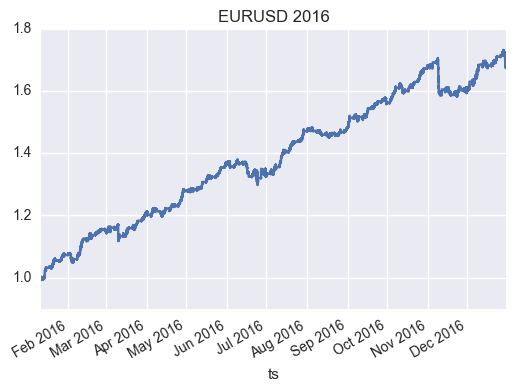

In [14]:
model = Baseline01(lookahead=1)
Y_test_pred = 1.0 - model.predict(prices_test)
metrics.performance_report(title,  prices_test,  lookahead, Y_test, Y_test_pred, cum_return_plot=True);

EURUSD 2016: f1-score: 0.512, mean future return: 0.019 bps, (0.019 bps), annualized future return 1.044 (1.045)


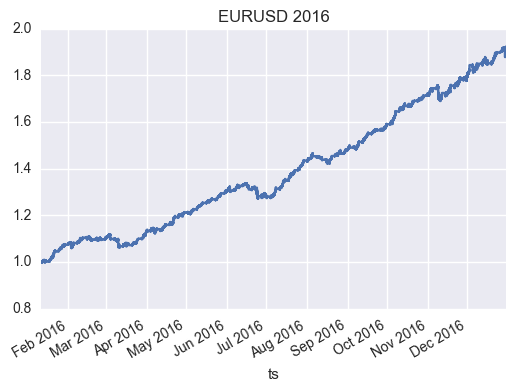

In [15]:
model = Baseline02SMA(lookahead=1, window=9)
Y_test_pred = 1.0 - model.predict(prices_test)
metrics.performance_report(title,  prices_test,  lookahead, Y_test, Y_test_pred, cum_return_plot=True, heatmap=False);


EURUSD 2016: f1-score: 0.516, mean future return: 0.025 bps, (0.025 bps), annualized future return 1.535 (1.535)


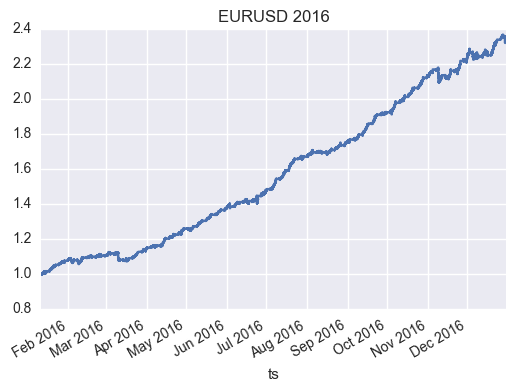

In [16]:
model = Baseline02EWMA(lookahead=1, centre_of_mass=21)
Y_test_pred = 1.0 - model.predict(prices_test)
metrics.performance_report(title,  prices_test,  lookahead, Y_test, Y_test_pred, cum_return_plot=True, heatmap=False);
